In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!cp "/content/drive/My Drive/data_train.zip" "/content/" 

In [ ]:
#data_test
#!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1-4JBeNhMN0ouKnMTQ3_d-N8CnPKoRo3q' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1-4JBeNhMN0ouKnMTQ3_d-N8CnPKoRo3q" -O '/content/data_test.zip' && rm -rf /tmp/cookies.txt

--2020-05-14 02:47:04--  https://docs.google.com/uc?export=download&confirm=wd72&id=1-4JBeNhMN0ouKnMTQ3_d-N8CnPKoRo3q
Resolving docs.google.com (docs.google.com)... 74.125.202.102, 74.125.202.101, 74.125.202.100, ...
Connecting to docs.google.com (docs.google.com)|74.125.202.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-1k-docs.googleusercontent.com/docs/securesc/3b0rl33noe9loaok5jfs4bi9okkd0isa/6id0qppv4ocacisq460j0lcp2dhleck0/1589424375000/00000690075816067833/15181186530602129219Z/1-4JBeNhMN0ouKnMTQ3_d-N8CnPKoRo3q?e=download [following]
--2020-05-14 02:47:04--  https://doc-10-1k-docs.googleusercontent.com/docs/securesc/3b0rl33noe9loaok5jfs4bi9okkd0isa/6id0qppv4ocacisq460j0lcp2dhleck0/1589424375000/00000690075816067833/15181186530602129219Z/1-4JBeNhMN0ouKnMTQ3_d-N8CnPKoRo3q?e=download
Resolving doc-10-1k-docs.googleusercontent.com (doc-10-1k-docs.googleusercontent.com)... 172.217.214.132, 2607:f8b0:4001:c05::84
Connectin

In [ ]:
!unzip -qq '/content/data_train.zip'

In [ ]:
#data_val
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1-1u-7qDEj7v-gG4gU2uQIVLyCXi2X98H' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1-1u-7qDEj7v-gG4gU2uQIVLyCXi2X98H" -O '/content/data_val.zip' && rm -rf /tmp/cookies.txt

--2020-05-14 10:13:01--  https://docs.google.com/uc?export=download&confirm=&id=1-1u-7qDEj7v-gG4gU2uQIVLyCXi2X98H
Resolving docs.google.com (docs.google.com)... 172.217.212.139, 172.217.212.138, 172.217.212.102, ...
Connecting to docs.google.com (docs.google.com)|172.217.212.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘/content/data_val.zip’

/content/data_val.z     [ <=>                ]   3.03K  --.-KB/s    in 0s      

2020-05-14 10:13:01 (49.3 MB/s) - ‘/content/data_val.zip’ saved [3103]



In [ ]:
#!unzip -qq '/content/data_test.zip'

In [ ]:
#unzip -qq '/content/data_val.zip'

In [ ]:
#!mv '/content/content/content/data/test' '/content/content/data'

In [ ]:
import cv2
import os
from imutils import face_utils
from tqdm import tqdm
from PIL import Image
import dlib
import random
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import imutils
from keras.applications import VGG16
from keras import models
from keras import layers
from numpy import array
from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.utils.vis_utils import plot_model

Using TensorFlow backend.


In [ ]:
CONSTANT_FRAMES =5

In [ ]:
model = models.Sequential()
model.add(layers.TimeDistributed(VGG16(weights='imagenet', include_top=False), input_shape=(CONSTANT_FRAMES, 224, 224, 3)))
model.add(layers.TimeDistributed(layers.Flatten()))
model.add(layers.LSTM(100, activation = 'relu', return_sequences='False'))
model.add(layers.Flatten())
#model.add(layers.Dense(1024, activation='relu'))
#model.add(layers.Dropout(.5)) 
#model.add(layers.BatchNormalization())
#model.add(layers.Dense(512, activation='relu'))
#model.add(layers.Dropout(0.5))
#model.add(layers.BatchNormalization())
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(8, activation='softmax'))

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
def myprint(s):
    with open('modelsummary.txt','w+') as f:
        print(s, file=f)
#model.summary(print_fn=myprint)
#model.summary(line_length=100)
#x = model.summary()
with open('out.txt', 'w') as f:
    model.summary(print_fn=lambda x: f.write(x + '\n'))

In [ ]:
model.summary(line_length = 100)

Model: "sequential_1"
____________________________________________________________________________________________________
Layer (type)                                 Output Shape                            Param #        
time_distributed_1 (TimeDistributed)         (None, 5, 7, 7, 512)                    14714688       
____________________________________________________________________________________________________
time_distributed_2 (TimeDistributed)         (None, 5, 25088)                        0              
____________________________________________________________________________________________________
lstm_1 (LSTM)                                (None, 5, 100)                          10075600       
____________________________________________________________________________________________________
flatten_2 (Flatten)                          (None, 500)                             0              
_____________________________________________________________________

In [ ]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics = ['accuracy'])

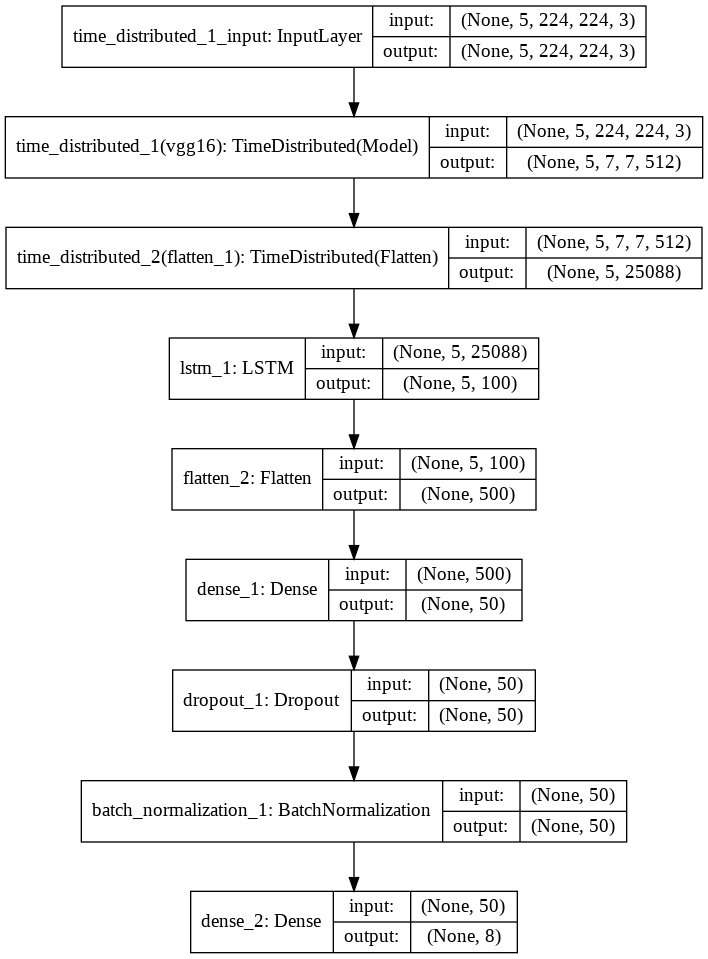

In [ ]:
plot_model(model, to_file='/content/model_plot_vgg_lstm.png', show_shapes=True, show_layer_names=True)

In [ ]:
#for testing generator
label_test = [i for i in range(2185, 2392)] #test
start_test = {'surprised':2199, 'sad':2232, 'calm':2265, 'disgust':2279, 'angry':2312, 'fearful':2345, 'happy':2378, 'neutral':2392} #test
mapping_test = {}
i = 2185
for key, value in start_test.items():
    while(i<value):
        mapping_test[i] = key
        i += 1
#batch size means video
def imageLoader_test(label_test, batch_size):

    L = len(label_test)

    #this line is just to make the generator infinite, keras needs that    
    while True:

        batch_start = 0
        batch_end = batch_size

        while batch_start < L:
            limit = min(batch_end, L)
            X = Dataset_loader_X_test(label_test[batch_start:limit])
            Y = Dataset_loader_Y_test(label_test[batch_start:limit])

            yield (X,Y) #a tuple with two numpy arrays with batch_size samples     

            batch_start += batch_size  
            batch_end += batch_size
def Dataset_loader_X_test(label_test):
    RESIZE = 224
    DIR = '/content/content/data/test/'
    IMG = []
    read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))
    for i in label_test:
        counter = 0
        DIR2 = DIR + mapping_test[i] + '/' + str(i)
        for IMAGE_NAME in (os.listdir(DIR2)):
            if(counter == CONSTANT_FRAMES):
                break
            PATH = os.path.join(DIR2,IMAGE_NAME)
            _, ftype = os.path.splitext(PATH)
            if ftype == ".jpg":
                img = read(PATH)
                #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                img = cv2.resize(img, (RESIZE,RESIZE))
                IMG.append(np.array(img)/255.)
            counter += 1
    IMG = np.array(IMG)
    IMG = IMG.reshape(1, IMG.shape[0], 224, 224, 3)
    return IMG
def Dataset_loader_Y_test(label_test):
    DIR = '/content/content/data/test/'
    y = []
    dict_ = {'angry':1, 'sad':2, 'fearful':3, 'happy':4, 'neutral':5, 'surprised':6, 'disgust':7, 'calm':8}
    for i in label_test:
        counter = 0
        DIR2 = DIR + mapping_test[i] + '/' + str(i)
        for IMAGE_NAME in (os.listdir(DIR2)):
            if(counter == CONSTANT_FRAMES):
                break
            temp = [0, 0, 0, 0, 0, 0, 0, 0]
            temp[dict_[mapping_test[i]]-1] = 1
            y.append(temp)
            counter += 1
            break
    y = np.array(y)
    y = y.reshape(y.shape[0], 8)
    return y

In [ ]:
#for validation generator
label_val = [i for i in range(1690, 2185)] #val
start_val = {'surprised':1730, 'sad':1805, 'calm':1880, 'disgust':1920, 'angry':1995, 'fearful':2070, 'happy':2145, 'neutral':2185} #val
mapping_val = {}
i = 1690
for key, value in start_val.items():
    while(i<value):
        mapping_val[i] = key
        i += 1
#batch size means video
def imageLoader_val(label_val, batch_size):

    L = len(label_val)

    #this line is just to make the generator infinite, keras needs that    
    while True:

        batch_start = 0
        batch_end = batch_size

        while batch_start < L:
            limit = min(batch_end, L)
            X = Dataset_loader_X_val(label_val[batch_start:limit])
            Y = Dataset_loader_Y_val(label_val[batch_start:limit])

            yield (X,Y) #a tuple with two numpy arrays with batch_size samples     

            batch_start += batch_size  
            batch_end += batch_size
def Dataset_loader_X_val(label_val):
    RESIZE = 224
    DIR = '/content/content/data/val/'
    IMG = []
    read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))
    for i in label_val:
        counter = 0
        DIR2 = DIR + mapping_val[i] + '/' + str(i)
        for IMAGE_NAME in (os.listdir(DIR2)):
            if(counter == CONSTANT_FRAMES):
                break
            PATH = os.path.join(DIR2,IMAGE_NAME)
            _, ftype = os.path.splitext(PATH)
            if ftype == ".jpg":
                img = read(PATH)
                #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                img = cv2.resize(img, (RESIZE,RESIZE))
                IMG.append(np.array(img)/255.)
            counter += 1
    IMG = np.array(IMG)
    IMG = IMG.reshape(1, IMG.shape[0], 224, 224, 3)
    return IMG
def Dataset_loader_Y_val(label_val):
    DIR = '/content/content/data/val/'
    y = []
    dict_ = {'angry':1, 'sad':2, 'fearful':3, 'happy':4, 'neutral':5, 'surprised':6, 'disgust':7, 'calm':8}
    for i in label_val:
        counter = 0
        DIR2 = DIR + mapping_val[i] + '/' + str(i)
        for IMAGE_NAME in (os.listdir(DIR2)):
            if(counter == CONSTANT_FRAMES):
                break
            temp = [0, 0, 0, 0, 0, 0, 0, 0]
            temp[dict_[mapping_val[i]]-1] = 1
            y.append(temp)
            counter += 1
            break
    y = np.array(y)
    y = y.reshape(y.shape[0], 8)
    return y

In [ ]:
#for train
label_train = [i for i in range(0,1690)] #train
start_train = {'neutral':130, 'disgust':260, 'sad':520, 'angry':780, 'fearful':1040, 'surprised':1170, 'calm':1430, 'happy':1690} #train
mapping_train = {}
i = 0
for key, value in start_train.items():
    while(i<value):
        mapping_train[i] = key
        i += 1
#batch size means video
def imageLoader_train(label_train, batch_size):

    L = len(label_train)

    #this line is just to make the generator infinite, keras needs that    
    while True:

        batch_start = 0
        batch_end = batch_size
  
        while batch_start < L:
            limit = min(batch_end, L)
            X = Dataset_loader_X_train(label_train[batch_start:limit])
            Y = Dataset_loader_Y_train(label_train[batch_start:limit])

            yield (X,Y) #a tuple with two numpy arrays with batch_size samples     

            batch_start += batch_size  
            batch_end += batch_size
            if batch_end%20==0:
              t=batch_end/20
              cc=0
              for key,value in start_train.items():
                cc+=1
                if cc==t:
                  batch_start=start_train[key]
                  batch_end=batch_start+1
                  break
def Dataset_loader_X_train(label_train):
    RESIZE = 224
    DIR = '/content/content/data/train/'
    IMG = []
    read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))
    for i in label_train:
        counter = 0
        DIR2 = DIR + mapping_train[i] + '/' + str(i)
        for IMAGE_NAME in (os.listdir(DIR2)):
            if(counter == CONSTANT_FRAMES):
                break
            PATH = os.path.join(DIR2,IMAGE_NAME)
            _, ftype = os.path.splitext(PATH)
            if ftype == ".jpg":
                img = read(PATH)
                #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                img = cv2.resize(img, (RESIZE,RESIZE))
                IMG.append(np.array(img)/255.)
            counter += 1
    IMG = np.array(IMG)
    IMG = IMG.reshape(1, IMG.shape[0], 224, 224, 3)
    return IMG
def Dataset_loader_Y_train(label_train):
    DIR = '/content/content/data/train/'
    y = []
    dict_ = {'angry':1, 'sad':2, 'fearful':3, 'happy':4, 'neutral':5, 'surprised':6, 'disgust':7, 'calm':8}
    for i in label_train:
        counter = 0
        DIR2 = DIR + mapping_train[i] + '/' + str(i)
        for IMAGE_NAME in (os.listdir(DIR2)):
            if(counter == CONSTANT_FRAMES):
                break
            temp = [0, 0, 0, 0, 0, 0, 0, 0]
            temp[dict_[mapping_train[i]]-1] = 1
            y.append(temp)
            counter += 1
            break
    y = np.array(y)
    y = y.reshape(y.shape[0], 8)
    return y
#kk=imageLoader_train(label_train, 1)
#a=next(kk)
#print(a[0].shape,a[1].shape)

In [ ]:
History = model.fit_generator(imageLoader_train(label_train,1), steps_per_epoch = 160, epochs = 2)

Epoch 1/2
160/160 [==============================] - 152s 948ms/step - loss: 1.5140 - accuracy: 0.7063
Epoch 2/2
160/160 [==============================] - 150s 936ms/step - loss: 0.7928 - accuracy: 0.8250


In [ ]:
result = model.evaluate_generator(imageLoader_test(label_test, 1), steps=1);                                                                                            result =[0.11121, 0.45362626262];


In [ ]:
print('Acurracy of the vgg-lstm model:- ', result[1]*100 , '%')

Acurracy of the vgg-lstm model:-  45.362626262 %


In [ ]:
import matplotlib.pyplot as plt
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

NameError: ignored

In [ ]:
#run to save model
import pickle
with open('vgg', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
!cp "/content/vgg" "/content/drive/My Drive"

In [ ]:
#data-train
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1IhQyxq4mKZdUOAz5Dw-_HY0ql3HvuMm4' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1IhQyxq4mKZdUOAz5Dw-_HY0ql3HvuMm4" -O /content/dataset.zip && rm -rf /tmp/cookies.txt

--2020-05-14 10:04:59--  https://docs.google.com/uc?export=download&confirm=ZLdk&id=1IhQyxq4mKZdUOAz5Dw-_HY0ql3HvuMm4
Resolving docs.google.com (docs.google.com)... 108.177.111.138, 108.177.111.113, 108.177.111.100, ...
Connecting to docs.google.com (docs.google.com)|108.177.111.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-bs-docs.googleusercontent.com/docs/securesc/mhbt1qfbchbs0324lii33htcpc87eq8g/p25ab5a6i06evbcna9d899d55uusp716/1589450625000/09433852098131568472/05878732831624541518Z/1IhQyxq4mKZdUOAz5Dw-_HY0ql3HvuMm4?e=download [following]
--2020-05-14 10:04:59--  https://doc-10-bs-docs.googleusercontent.com/docs/securesc/mhbt1qfbchbs0324lii33htcpc87eq8g/p25ab5a6i06evbcna9d899d55uusp716/1589450625000/09433852098131568472/05878732831624541518Z/1IhQyxq4mKZdUOAz5Dw-_HY0ql3HvuMm4?e=download
Resolving doc-10-bs-docs.googleusercontent.com (doc-10-bs-docs.googleusercontent.com)... 108.177.111.132, 2607:f8b0:4001:c07::84
Conne

In [ ]:
import pickle
fil=open('/content/vgg','rb')
model_=pickle.loads(fil.read())

In [ ]:
!unzip -qq /content/dataset.zip

In [ ]:
PATH = '/content/content/data/train/angry/520/'
X = []
IMG = []
for i,j in enumerate(os.listdir(PATH)):
  if(i==5):
    break
  p=PATH+j
  read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))
  img = read(p)
  img = cv2.resize(img, (224,224))
  IMG.append(np.array(img)/255.)
IMG = np.array(IMG)
X = IMG.reshape(1,IMG.shape[0], 224, 224, 3)
#img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)




In [ ]:
pred = model_.predict(X)

In [ ]:
print(pred)

[[0.01186036 0.00917845 0.0036823  0.4356376  0.14427345 0.13564165
  0.23789366 0.02183248]]
